Financial Data for Sustainable Development Companies:
  Ticker                       Company ESG Score             Sector  \
0   TSLA                   Tesla, Inc.       N/A  Consumer Cyclical   
1    NEE          NextEra Energy, Inc.       N/A          Utilities   
2   ENPH          Enphase Energy, Inc.       N/A         Technology   
3   SEDG  SolarEdge Technologies, Inc.       N/A         Technology   
4   PLUG               Plug Power Inc.       N/A        Industrials   

                         Industry  Debt-to-Equity Ratio  Current Ratio  \
0              Auto Manufacturers                18.078          1.844   
1  Utilities - Regulated Electric               139.015          0.411   
2                           Solar               143.041          4.160   
3                           Solar                79.305          2.344   
4    Electrical Equipment & Parts                30.654          2.076   

     Cash Flow   Total Debt    Market Cap Dividend Yield  
0    676625024 

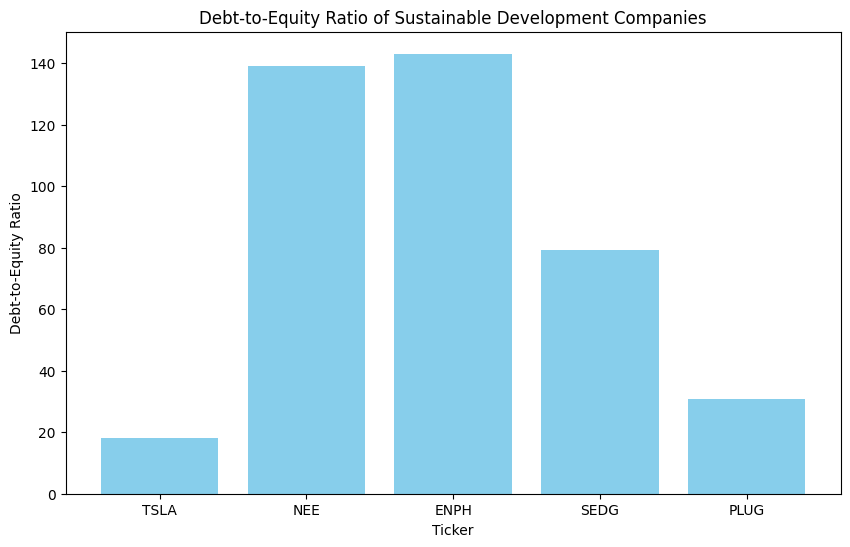

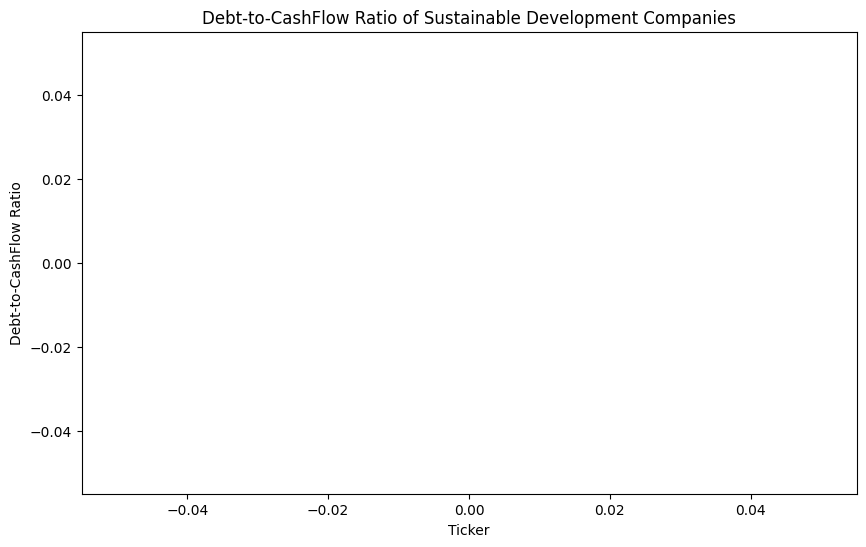

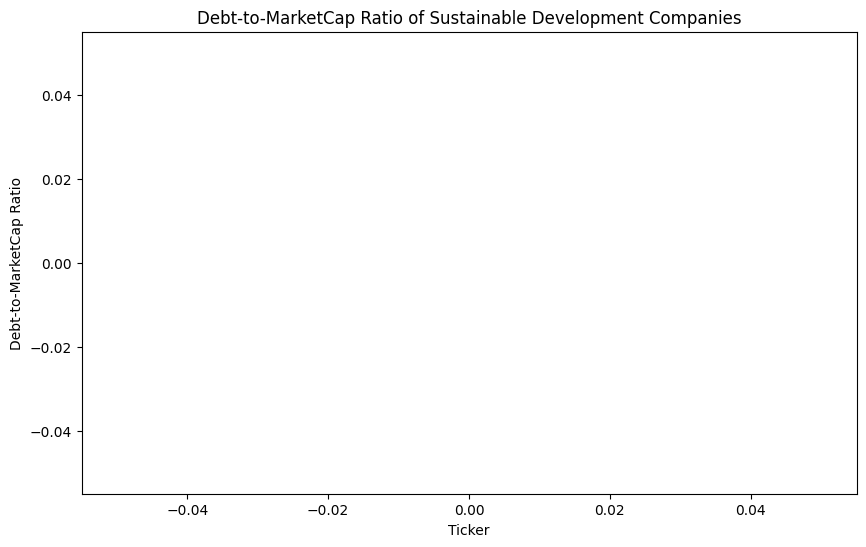

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of ticker symbols for companies focused on sustainable development.
# These could include companies in renewable energy, electric vehicles, or those with high ESG scores.
sustainable_tickers = ["TSLA", "NEE", "ENPH", "SEDG", "PLUG"]  # Example companies (replace with actual sustainable companies)

# Define a function to get basic financial metrics and ESG scores
def get_financial_data(tickers):
    data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        # Gather relevant data
        data.append({
            "Ticker": ticker,
            "Company": info.get("longName", "N/A"),
            "ESG Score": info.get("esgScores", {}).get("totalEsg", "N/A"),
            "Sector": info.get("sector", "N/A"),
            "Industry": info.get("industry", "N/A"),
            "Debt-to-Equity Ratio": info.get("debtToEquity", "N/A"),
            "Current Ratio": info.get("currentRatio", "N/A"),
            "Cash Flow": info.get("freeCashflow", "N/A"),
            "Total Debt": info.get("totalDebt", "N/A"),
            "Market Cap": info.get("marketCap", "N/A"),
            "Dividend Yield": info.get("dividendYield", "N/A")
        })
    # Convert to DataFrame
    return pd.DataFrame(data)

# Analyze bond-related metrics for sustainability
def analyze_bond_metrics(data):
    # Filter for companies with a healthy debt-to-equity ratio and high ESG scores
    sustainable_bonds = data[(data["Debt-to-Equity Ratio"] < 1.5) & (data["ESG Score"] != "N/A")]

    # Add analysis columns
    sustainable_bonds["Debt-to-CashFlow Ratio"] = sustainable_bonds["Total Debt"] / sustainable_bonds["Cash Flow"]
    sustainable_bonds["Debt-to-MarketCap Ratio"] = sustainable_bonds["Total Debt"] / sustainable_bonds["Market Cap"]

    # Filter for companies with manageable debt-to-cash flow ratios
    sustainable_bonds = sustainable_bonds[sustainable_bonds["Debt-to-CashFlow Ratio"] < 3]

    return sustainable_bonds


# Step 1: Get financial data for sustainable companies
financial_data = get_financial_data(sustainable_tickers)
print("Financial Data for Sustainable Development Companies:")
print(financial_data)

# Step 2: Analyze bond metrics for sustainability
bond_analysis = analyze_bond_metrics(financial_data)
print("\nBond Analysis for Sustainable Development Companies:")
print(bond_analysis)

# Plot the Debt-to-Equity Ratio
plt.figure(figsize=(10, 6))
plt.bar(financial_data['Ticker'], financial_data['Debt-to-Equity Ratio'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Debt-to-Equity Ratio')
plt.title('Debt-to-Equity Ratio of Sustainable Development Companies')
plt.show()

# Plot the Debt-to-CashFlow Ratio
plt.figure(figsize=(10, 6))
plt.bar(bond_analysis['Ticker'], bond_analysis['Debt-to-CashFlow Ratio'], color='lightgreen')
plt.xlabel('Ticker')
plt.ylabel('Debt-to-CashFlow Ratio')
plt.title('Debt-to-CashFlow Ratio of Sustainable Development Companies')
plt.show()

# Plot the Debt-to-MarketCap Ratio
plt.figure(figsize=(10, 6))
plt.bar(bond_analysis['Ticker'], bond_analysis['Debt-to-MarketCap Ratio'], color='salmon')
plt.xlabel('Ticker')
plt.ylabel('Debt-to-MarketCap Ratio')
plt.title('Debt-to-MarketCap Ratio of Sustainable Development Companies')
plt.show()